In [1]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

In [6]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [7]:
x_train, x_test = x_train / 255 , x_test / 255

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
r = model.fit(x_train, y_train , validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3027 - accuracy: 0.9116 - val_loss: 0.1532 - val_accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1503 - accuracy: 0.9557 - val_loss: 0.1031 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1101 - accuracy: 0.9668 - val_loss: 0.0863 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0904 - accuracy: 0.9725 - val_loss: 0.0826 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0780 - accuracy: 0.9750 - val_loss: 0.0746 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0674 - accuracy: 0.9784 - val_loss: 0.0715 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9804 - val_loss: 0.0687 - val_accuracy:

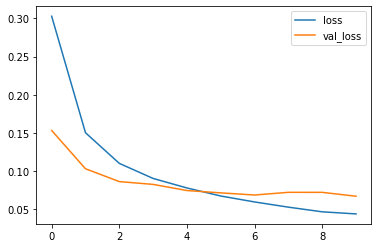

In [17]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

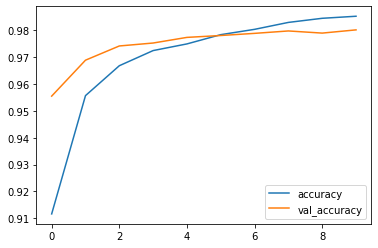

In [18]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [19]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 986us/step - loss: 0.0671 - accuracy: 0.9802
[0.06713821738958359, 0.9801999926567078]


Confusion matrix , without normalization
[[ 971    0    2    1    0    1    3    1    1    0]
 [   0 1125    2    2    0    1    2    0    3    0]
 [   3    0 1016    1    3    0    2    3    4    0]
 [   0    0    2  990    0    3    0    7    4    4]
 [   1    1    3    0  964    0    5    1    1    6]
 [   2    0    0    8    2  873    3    1    3    0]
 [   4    3    1    1    1    5  941    1    1    0]
 [   1    7    9    3    1    0    0  995    2   10]
 [   2    2    2    5    5    3    3    4  947    1]
 [   2    5    0    6    8    2    0    2    4  980]]


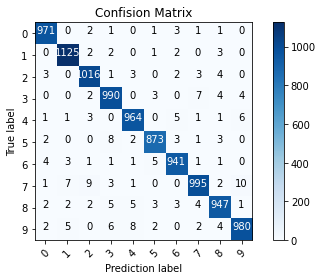

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm , classes, normalize=False, title='Confision Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix , without normalization')
  print(cm)


  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt) , horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Prediction label')


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 8 Predicted: 9')

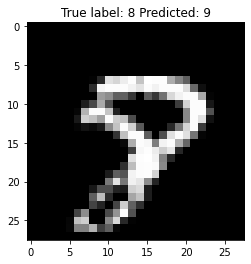

In [30]:
misclassified_idx = np.where (p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' %(y_test[i], p_test[i]))